In [1]:
wants <- c("lavaan","foreign","rcompanion","car","semPlot")
has   <- wants %in% rownames(installed.packages())
if(any(!has)) install.packages(wants[!has],repos="https://cloud.r-project.org/")

In [2]:
version$version.string

[1] "R version 3.6.1 (2019-07-05)"

In [3]:
library(lavaan)
library(foreign)
library(rcompanion)
library(car)
library(semPlot)

options(repr.plot.width=11, repr.plot.height=6)

This is lavaan 0.6-5
lavaan is BETA software! Please report any bugs.
Loading required package: carData
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
Registered S3 methods overwritten by 'huge':
  method    from   
  plot.sim  BDgraph
  print.sim BDgraph


In [4]:
dat_foreign=read.spss("Base LGBTI CELOS IS CONSUMO. sav.sav",
#                       use.value.labels = FALSE, 
                      to.data.frame=TRUE)
# library (haven)
# dat_haven=read_sav("Base LGBTI CELOS IS CONSUMO. sav.sav")
data=dat_foreign

re-encoding from UTF-8


# I Regresión Logística

Realice una regresión logística binaria, tomando el RIESGODECONSUMO como variable dependiente y como variables independientes las siguientes: Estratosocioeconómico, Hasidoinfielalgunavezenlavida, Seconsideracelosoa, TOTCELOS, TOTIDISDS, TOTIDIS, TOTALTABACO, TOTALALCOHOL, TOTALCANNABIS, TOTALCOCA y orientasexrecode2, responda lo siguiente:

In [5]:
RL_model <- glm(RIESGODECONSUMO ~Estratosocioeconómico + Hasidoinfielalgunavezenlavida + Seconsideracelosoa + TOTCELOS + TOTIDISDS + TOTIDIS + TOTALTABACO + TOTALALCOHOL + TOTALCANNABIS + TOTALCOCA + orientasexrecode2,
             family=binomial(link='logit'), # https://www.r-bloggers.com/how-to-perform-a-logistic-regression-in-r/
#              family="binomial", # https://stats.idre.ucla.edu/r/dae/logit-regression/
             data=data)

In [6]:
summary(RL_model)


Call:
glm(formula = RIESGODECONSUMO ~ Estratosocioeconómico + Hasidoinfielalgunavezenlavida + 
    Seconsideracelosoa + TOTCELOS + TOTIDISDS + TOTIDIS + TOTALTABACO + 
    TOTALALCOHOL + TOTALCANNABIS + TOTALCOCA + orientasexrecode2, 
    family = binomial(link = "logit"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0788   0.1334   0.2321   0.3249   3.8288  

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                     6.785291   1.567463   4.329
Estratosocioeconómico                          -0.390201   0.295796  -1.319
HasidoinfielalgunavezenlavidaSi ha sido infiel -1.128388   0.650776  -1.734
Seconsideracelosoa                              0.553930   0.534920   1.036
TOTCELOS                                       -0.033049   0.021764  -1.518
TOTIDISDS                                      -0.009019   0.048811  -0.185
TOTIDIS                                         0.0

In [7]:
# exp(confint(RL_model))

In [8]:
exp(RL_model$coefficients)

(Intercept) 
                                   884.7373572 
                         Estratosocioeconómico 
                                     0.6769205 
HasidoinfielalgunavezenlavidaSi ha sido infiel 
                                     0.3235543 
                            Seconsideracelosoa 
                                     1.7400784 
                                      TOTCELOS 
                                     0.9674916 
                                     TOTIDISDS 
                                     0.9910212 
                                       TOTIDIS 
                                     1.0044633 
                                   TOTALTABACO 
                                     1.0684251 
                                  TOTALALCOHOL 
                                     0.9441247 
                                 TOTALCANNABIS 
                                     0.8507709 
                                     TOTALCOCA 
                                     0.7092437 
              orientasexrecode2No Heterosexual 
                                     0.4231960

In [9]:
round(Anova(RL_model, type="II", test="Wald"),3)

,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
Estratosocioeconómico,1,1.740,0.187
Hasidoinfielalgunavezenlavida,1,3.006,0.083
Seconsideracelosoa,1,1.072,0.300
TOTCELOS,1,2.306,0.129
TOTIDISDS,1,0.034,0.853
TOTIDIS,1,0.001,0.971
TOTALTABACO,1,3.531,0.060
TOTALALCOHOL,1,2.354,0.125
TOTALCANNABIS,1,8.734,0.003


In [10]:
nagelkerke(RL_model)

$Models
                                                                                                                                                                                                                                                          
Model: "glm, RIESGODECONSUMO ~ Estratosocioeconómico + Hasidoinfielalgunavezenlavida + Seconsideracelosoa + TOTCELOS + TOTIDISDS + TOTIDIS + TOTALTABACO + TOTALALCOHOL + TOTALCANNABIS + TOTALCOCA + orientasexrecode2, binomial(link = \"logit\"), data"
Null:  "glm, RIESGODECONSUMO ~ 1, binomial(link = \"logit\"), data"                                                                                                                                                                                       

$Pseudo.R.squared.for.model.vs.null
                             Pseudo.R.squared
McFadden                             0.516411
Cox and Snell (ML)                   0.356947
Nagelkerke (Cragg and Uhler)         0.621086

$Likelihood.ratio.test
 Df.diff LogLik.diff  Chisq    p.value
     -11      -63.58 127.16 6.5306e-22

$Number.of.observations
          
Model: 288
Null:  288

$Messages
[1] "Note: For models fit with REML, these statistics are based on refitting with ML"

$Warnings
[1] "None"

In [11]:
anova(RL_model,
      update(RL_model, ~1),    # update here produces null model for comparison
      test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
276,119.0783,NA,NA,NA
287,246.2385,-11,-127.1601,6.530646e-22


In [12]:
predict_RL_model=table(factor((predict(RL_model,data,type='response')>.5)*1),
                       factor((data$RIESGODECONSUMO=="Con riesgo")*1))
predict_RL_model
round(prop.table(predict_RL_model, 1),3) # row percentages 



   
      0   1
  0  25   3
  1  19 241

   
        0     1
  0 0.893 0.107
  1 0.073 0.927

In [13]:
# wald.test(b = coef(RL_model), Sigma = vcov(RL_model), Terms = c(2,7,9,10))

In [14]:
reg_mod_fx=function(ha_sido_infiel,tot_celos, tot_alcohol, tot_cannabis){
    pred_val=6.785291+(ha_sido_infiel*-1.128388)+(tot_celos*-0.033049)+(tot_alcohol*-0.057497)+(tot_cannabis*-0.161612)
    return(1/(1+exp(−pred_val)))
}

In [15]:
reg_mod_fx(1,67,30,20)

[1] 0.1802684

# Modelo de ecuaciones estructurales en R

[Paquete Lavaan](http://lavaan.ugent.be/)

[R-Bloggers SEM model](https://www.r-bloggers.com/structural-equation-modelling-in-r-part-1/)

In [16]:
dat_mod=data[c("orientasexrecode2","TOTCELOS","TOTIDISDS","TOTIDIS")]
dat_mod$orientasexrecode2=(dat_mod$orientasexrecode2=="No Heterosexual")*1

In [17]:
model <- '
   # regressions
     f_1=~ orientasexrecode2 + TOTCELOS + TOTIDISDS + TOTIDIS
  # residual correlations
    orientasexrecode2 ~~ TOTCELOS + TOTIDISDS + TOTIDIS
    TOTCELOS ~~ TOTIDISDS + TOTIDIS
    TOTIDISDS ~~ TOTIDIS
'

In [21]:
fit_cfa <- cfa(model,data=dat_mod)
summary(fit_cfa, fit.measures=TRUE)

Warning message in lav_model_vcov(lavmodel = lavmodel2, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"

lavaan 0.6-5 ended normally after 85 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         14
                                                      
  Number of observations                           288
                                                      
Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -4
  P-value (Unknown)                                 NA

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                       NA
  Tucker-Lewis Index (TLI)                          NA

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2806.437
  Loglikelihood unrestricted model (H1)      -2806.437
                                                      
  Akaike (AIC)           

In [19]:
fit_sem <- sem(model,data=dat_mod)
summary(fit_sem)

Warning message in lav_model_vcov(lavmodel = lavmodel2, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"

lavaan 0.6-5 ended normally after 85 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         14
                                                      
  Number of observations                           288
                                                      
Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -4
  P-value (Unknown)                                 NA

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard errors                             Standard

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  f_1 =~                                              
    orientasexrcd2    1.000                           
    TO

Warning message in qgraph::qgraph(Edgelist, labels = nLab, bidirectional = Bidir, :
"The following arguments are not documented and likely not arguments of qgraph and thus ignored: node.label.cex"

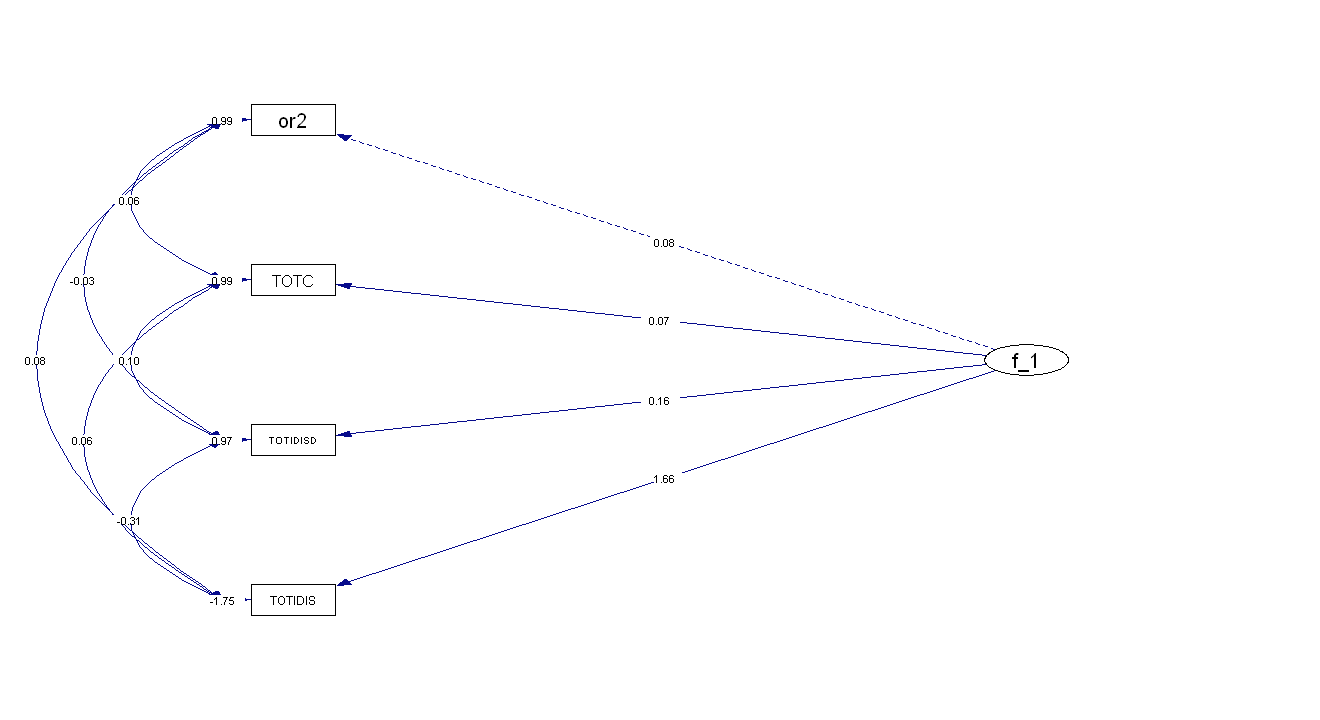

In [20]:
semPaths(fit_sem, style="lisrel", 
        whatLabels = "std", edge.label.cex = .6, node.label.cex = .6, 
        label.prop=0.9, edge.label.color = "black", rotation = 4, 
        equalizeManifests = FALSE, optimizeLatRes = TRUE, node.width = 1.5, 
        edge.width = 0.5, shapeMan = "rectangle", shapeLat = "ellipse", 
        shapeInt = "triangle", sizeMan = 4, sizeInt = 2, sizeLat = 4, 
        curve=2, unCol = "#070b8c")
